In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pymysql

In [2]:
df = pd.read_csv("Solo_x_data.csv")
df.head()

,Letter,x_box,y_box,width,height,onpix_total,x_bar,y_bar,x2_bar,y2_bar,xy_bar,x2y_bar,xy2_bar,x_ege,xegvy,y_ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df.describe()

,x_box,y_box,width,height,onpix_total,x_bar,y_bar,x2_bar,y2_bar,xy_bar,x2y_bar,xy2_bar,x_ege,xegvy,y_ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [4]:
# Gives us the no of cells with NA in each column.

df.isna().sum()

Letter         0
x_box          0
y_box          0
width          0
height         0
onpix_total    0
x_bar          0
y_bar          0
x2_bar         0
y2_bar         0
xy_bar         0
x2y_bar        0
xy2_bar        0
x_ege          0
xegvy          0
y_ege          0
yegvx          0
dtype: int64

In [5]:
# Its easier to work with numarical data then strings (int, float, bool).

df.dtypes

Letter         object
x_box           int64
y_box           int64
width           int64
height          int64
onpix_total     int64
x_bar           int64
y_bar           int64
x2_bar          int64
y2_bar          int64
xy_bar          int64
x2y_bar         int64
xy2_bar         int64
x_ege           int64
xegvy           int64
y_ege           int64
yegvx           int64
dtype: object

In [6]:
df["index"] = df.index
df.sort_values(["Letter", "index"], inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df.head()

,Letter,x_box,y_box,width,height,onpix_total,x_bar,y_bar,x2_bar,y2_bar,xy_bar,x2y_bar,xy2_bar,x_ege,xegvy,y_ege,yegvx
0,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
1,A,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
2,A,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7
3,A,2,1,4,2,1,8,1,2,2,7,2,8,2,5,2,7
4,A,3,7,5,5,3,10,4,1,2,8,3,9,2,4,2,7


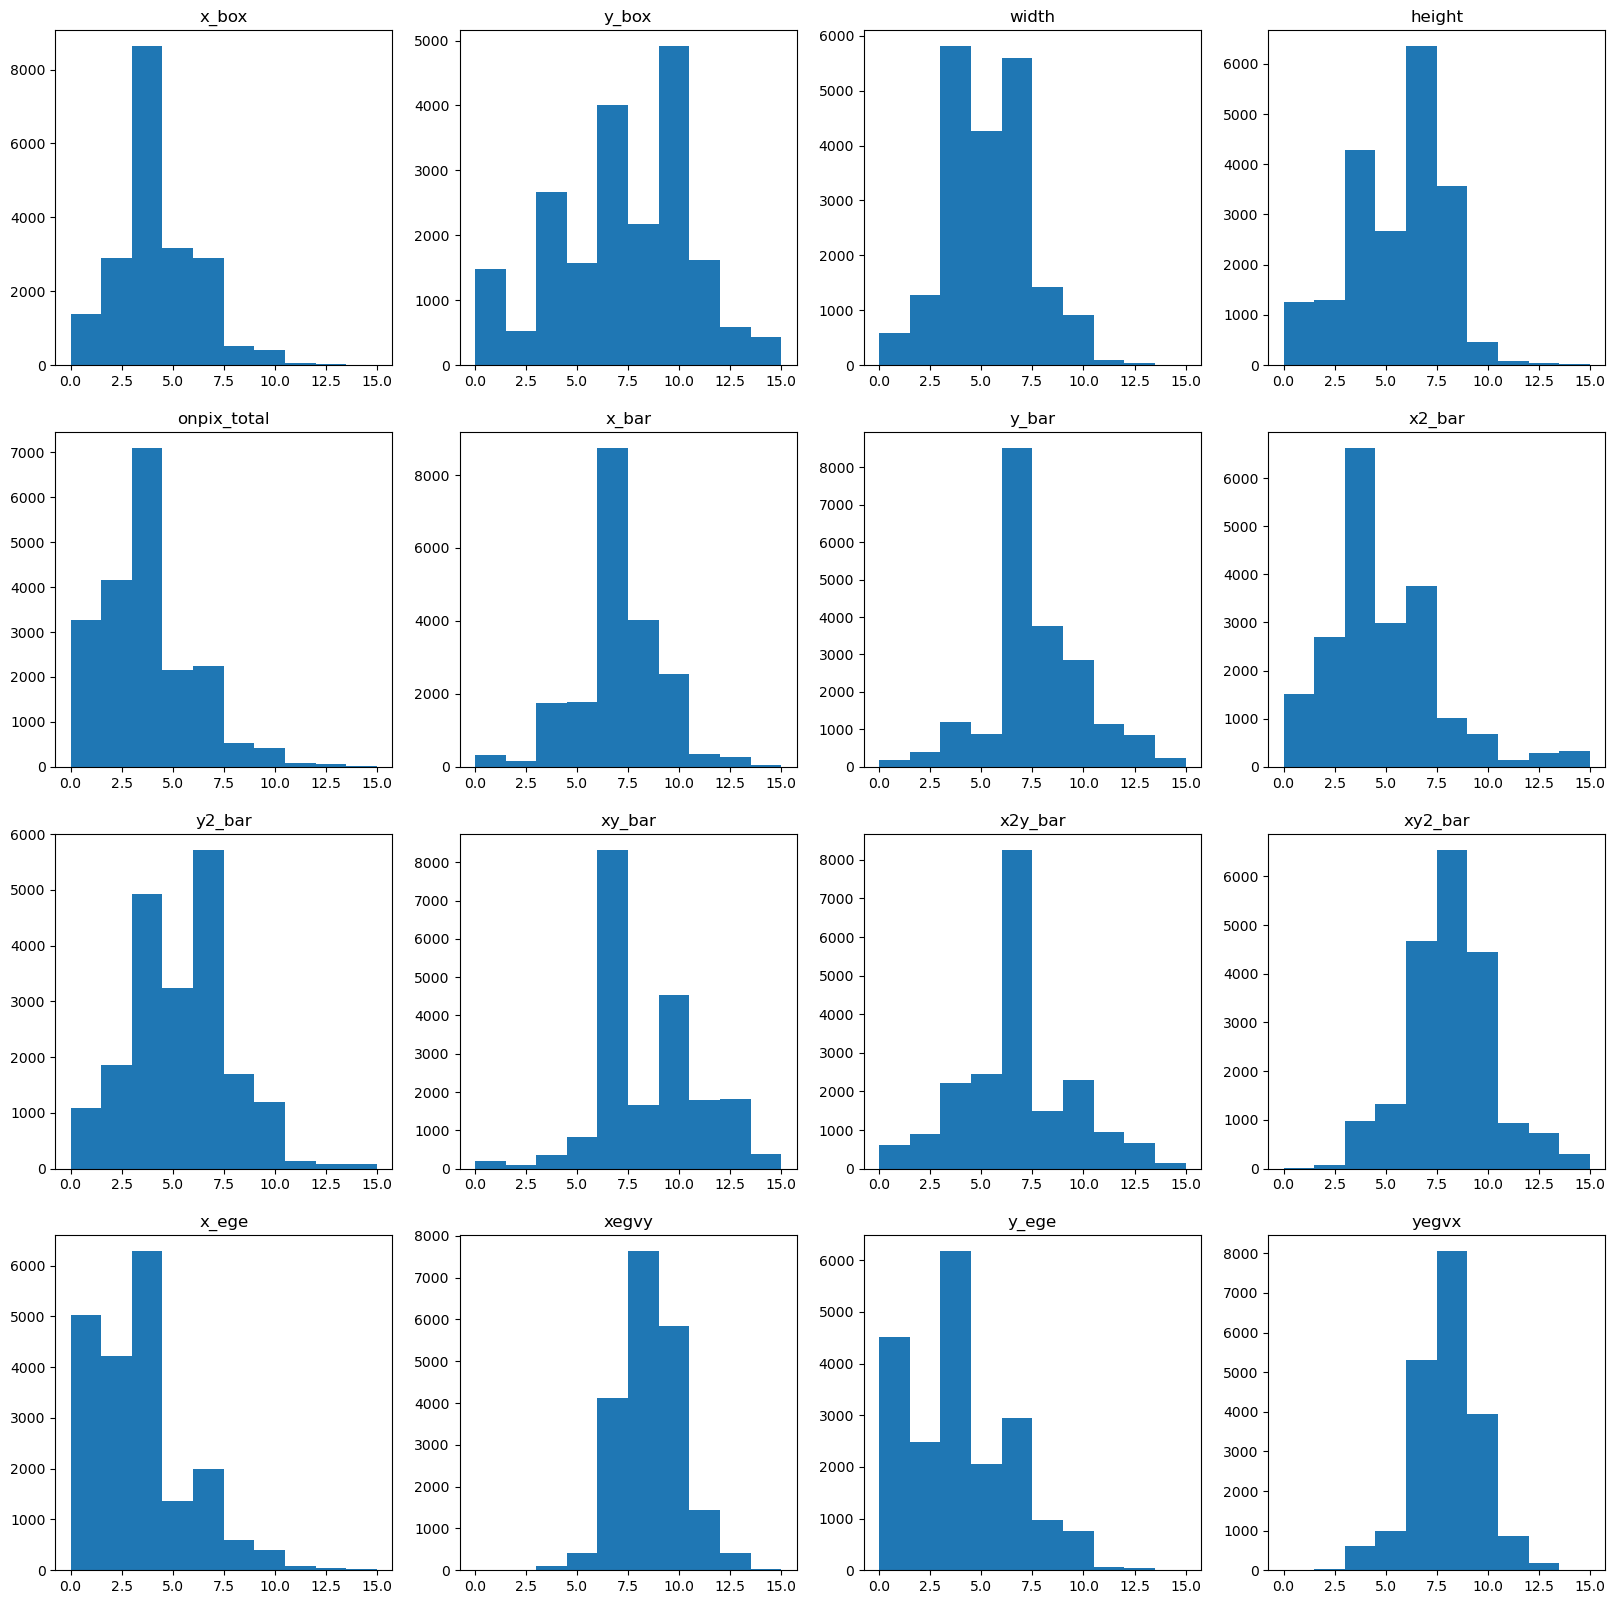

In [7]:
fhist = plt.figure()
fhist.set_figwidth(20)
fhist.set_figheight(20)
titles = list(df.columns)

# To find outliers using histograms.

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.hist(df[df.columns[[i]]])
    plt.title(titles[i])

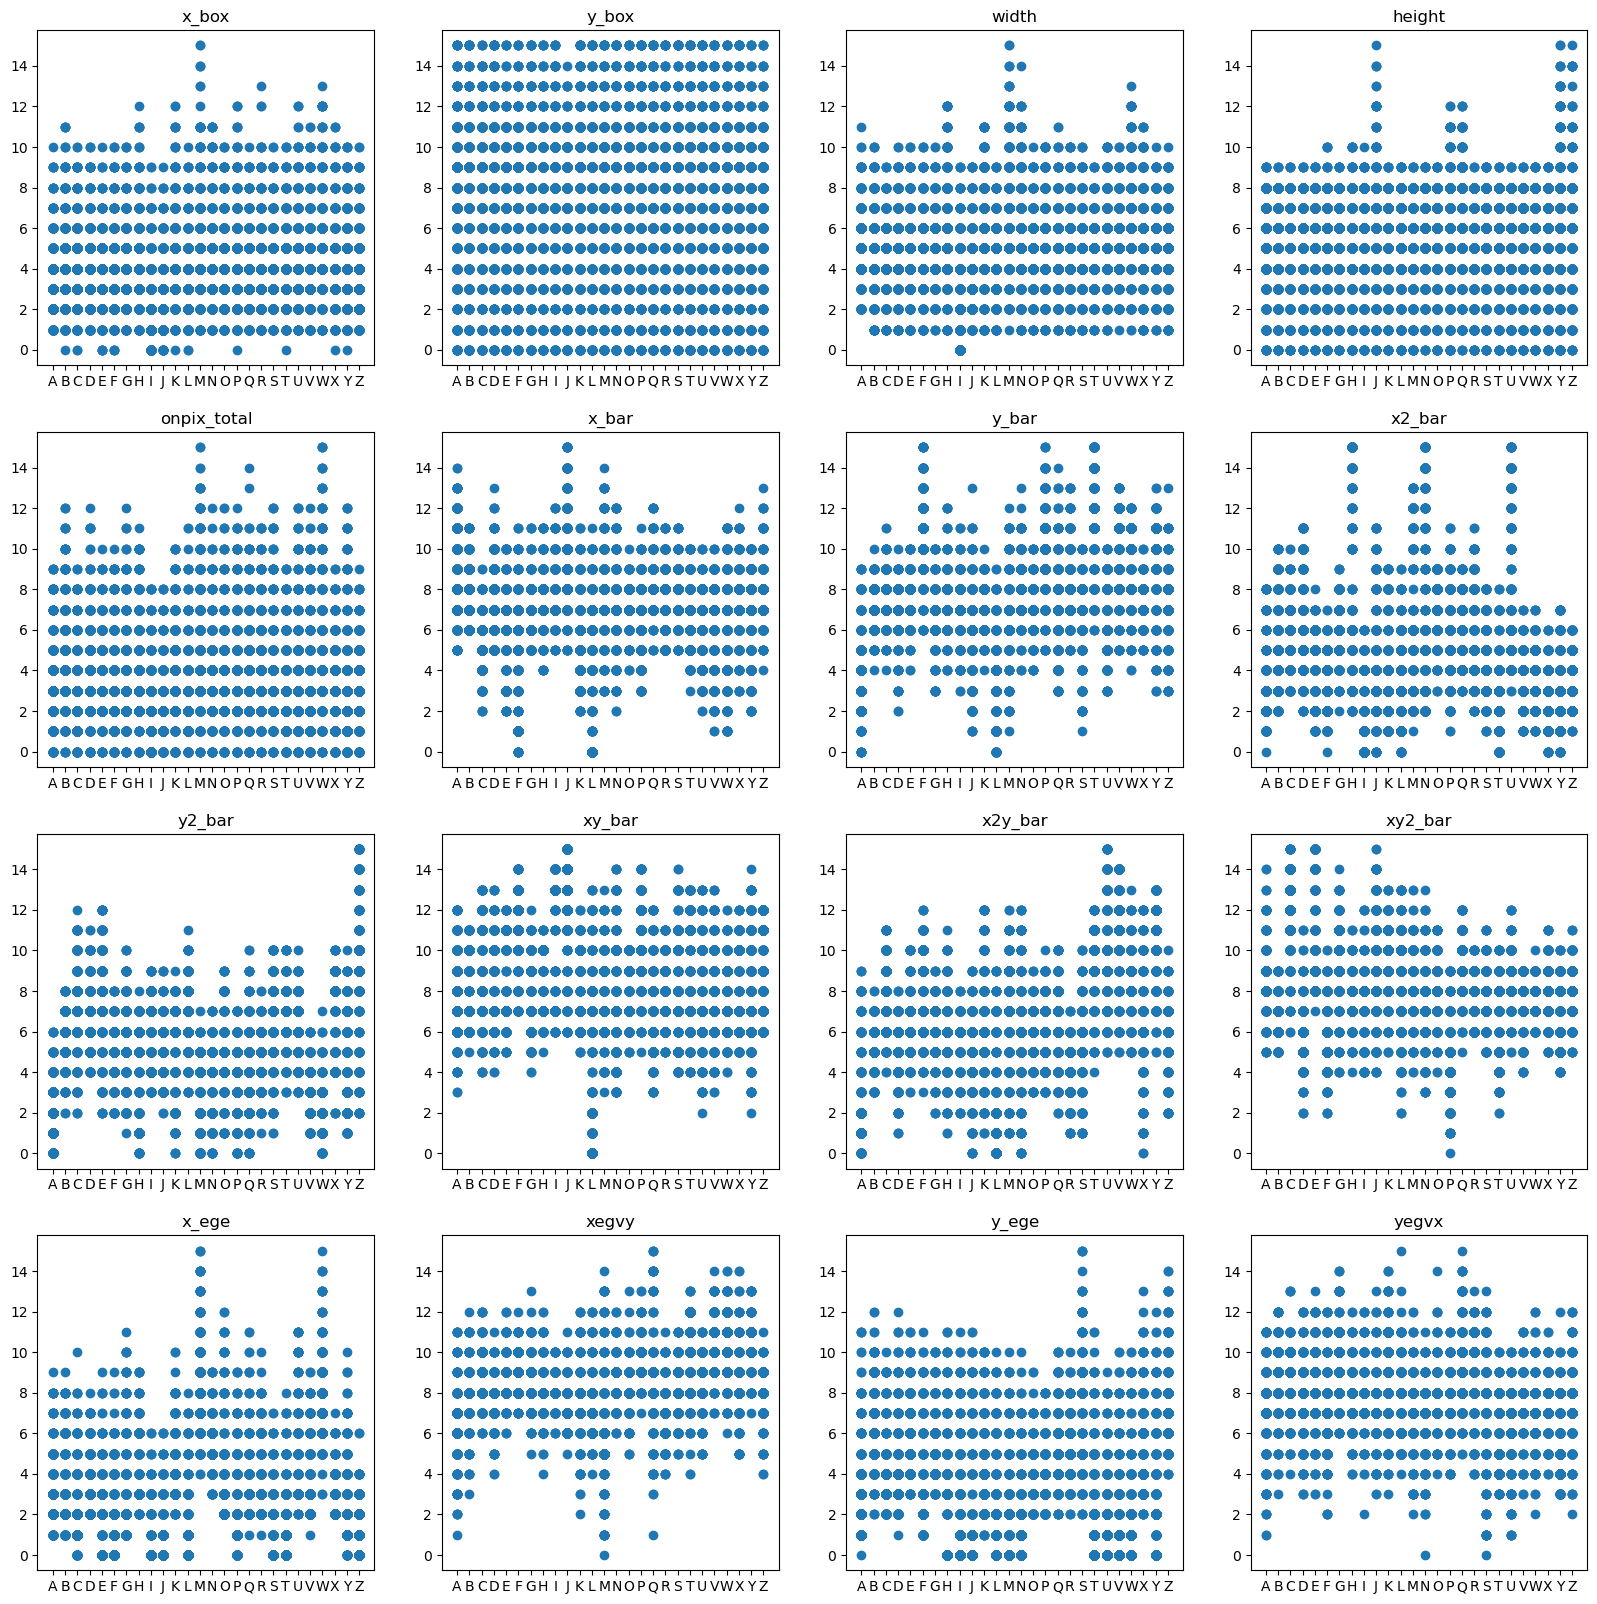

In [8]:
fscatter = plt.figure()
fscatter.set_figwidth(20)
fscatter.set_figheight(20)
titles = list(df.columns)

# To find outliers using scatter plots

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.scatter(df["Letter"],df[df.columns[[i]]])
    plt.title(titles[i])

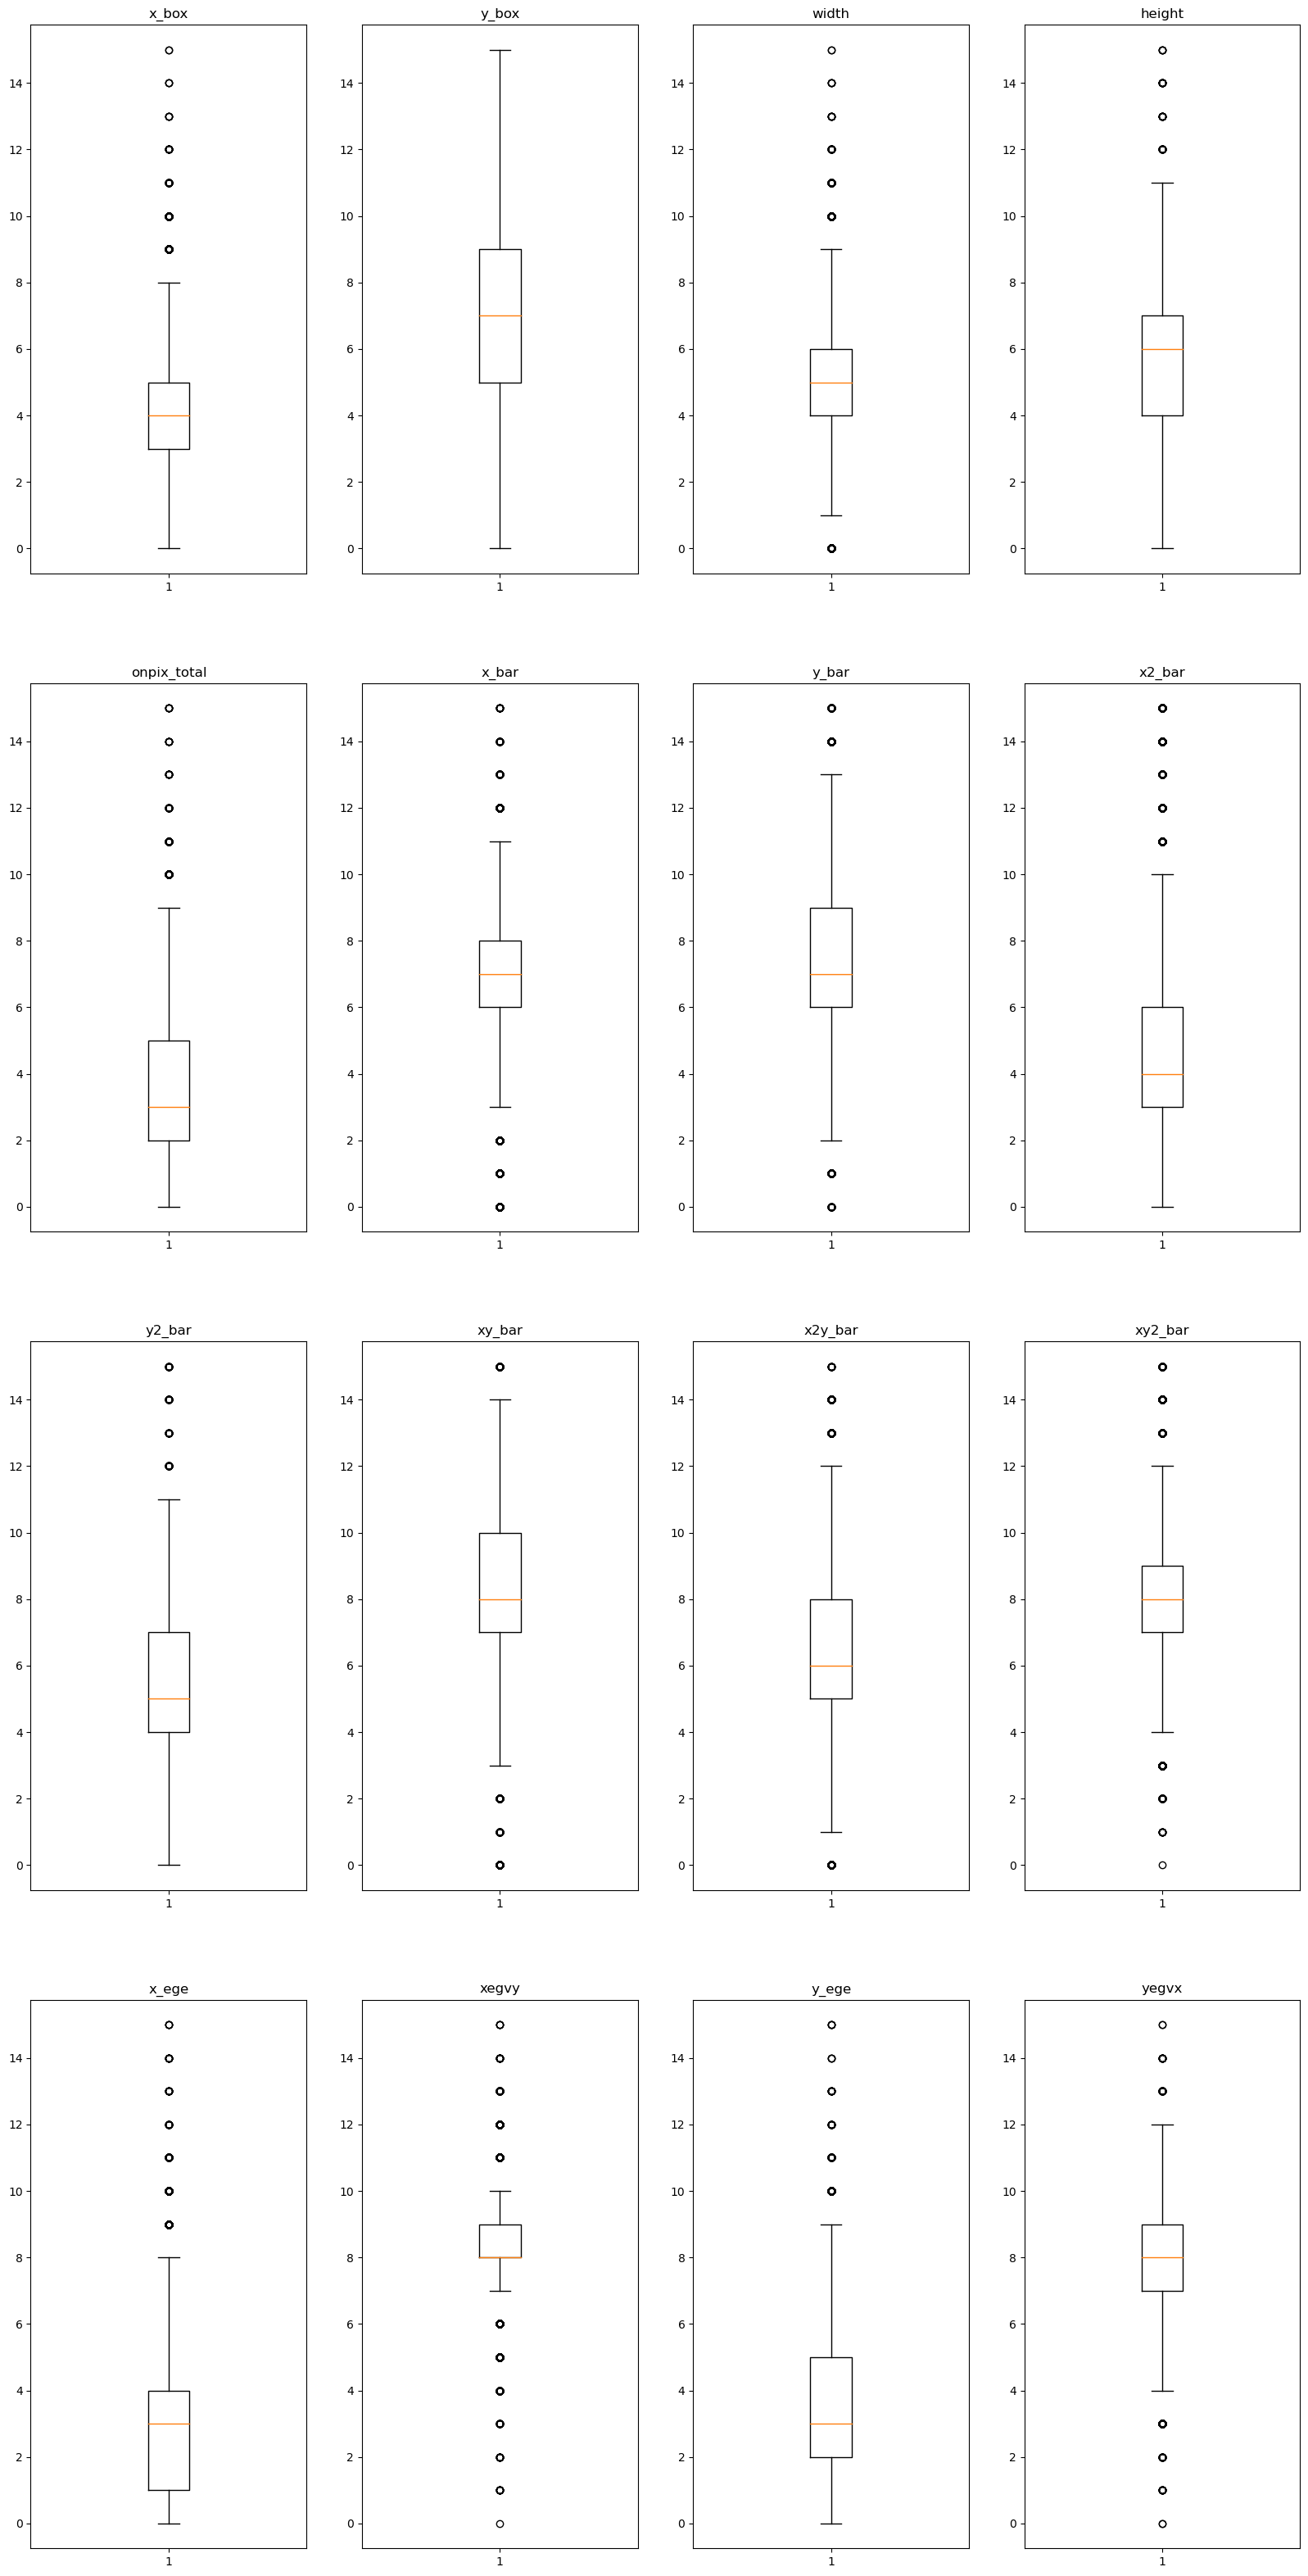

In [9]:
fbox = plt.figure()
fbox.set_figwidth(20)
fbox.set_figheight(40)
titles = list(df.columns)

# To find outliers using box plots

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.boxplot(df[df.columns[[i]]])
    plt.title(titles[i])

In [11]:
df.to_csv("solo_x_data_cleaned.csv", index = False)
df.to_pickle("solo_x_data_cleaned.pkl")
np.savez("solo_x_data_cleaned.npz", df.to_numpy(), index = False)

In [14]:
connection = pymysql.connect(user='root', password='sqlroot0', database='Solo_x_data', host='127.0.0.1')

query = "SELECT * FROM Solo_x_data.solo_x_data"

test_df = pd.read_sql(query, connection)
test_df.head()

/Users/harikeshgovindaiahgari/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Letter,x_box,y_box,width,height,onpix_total,x_bar,y_bar,x2_bar,y2_bar,xy_bar,x2y_bar,xy2_bar,x_ege,xegvy,y_ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
